# **Previsão da emissão de Dióxido de Carbono de veículos**

Por **Gustavo Andrade Tavares**

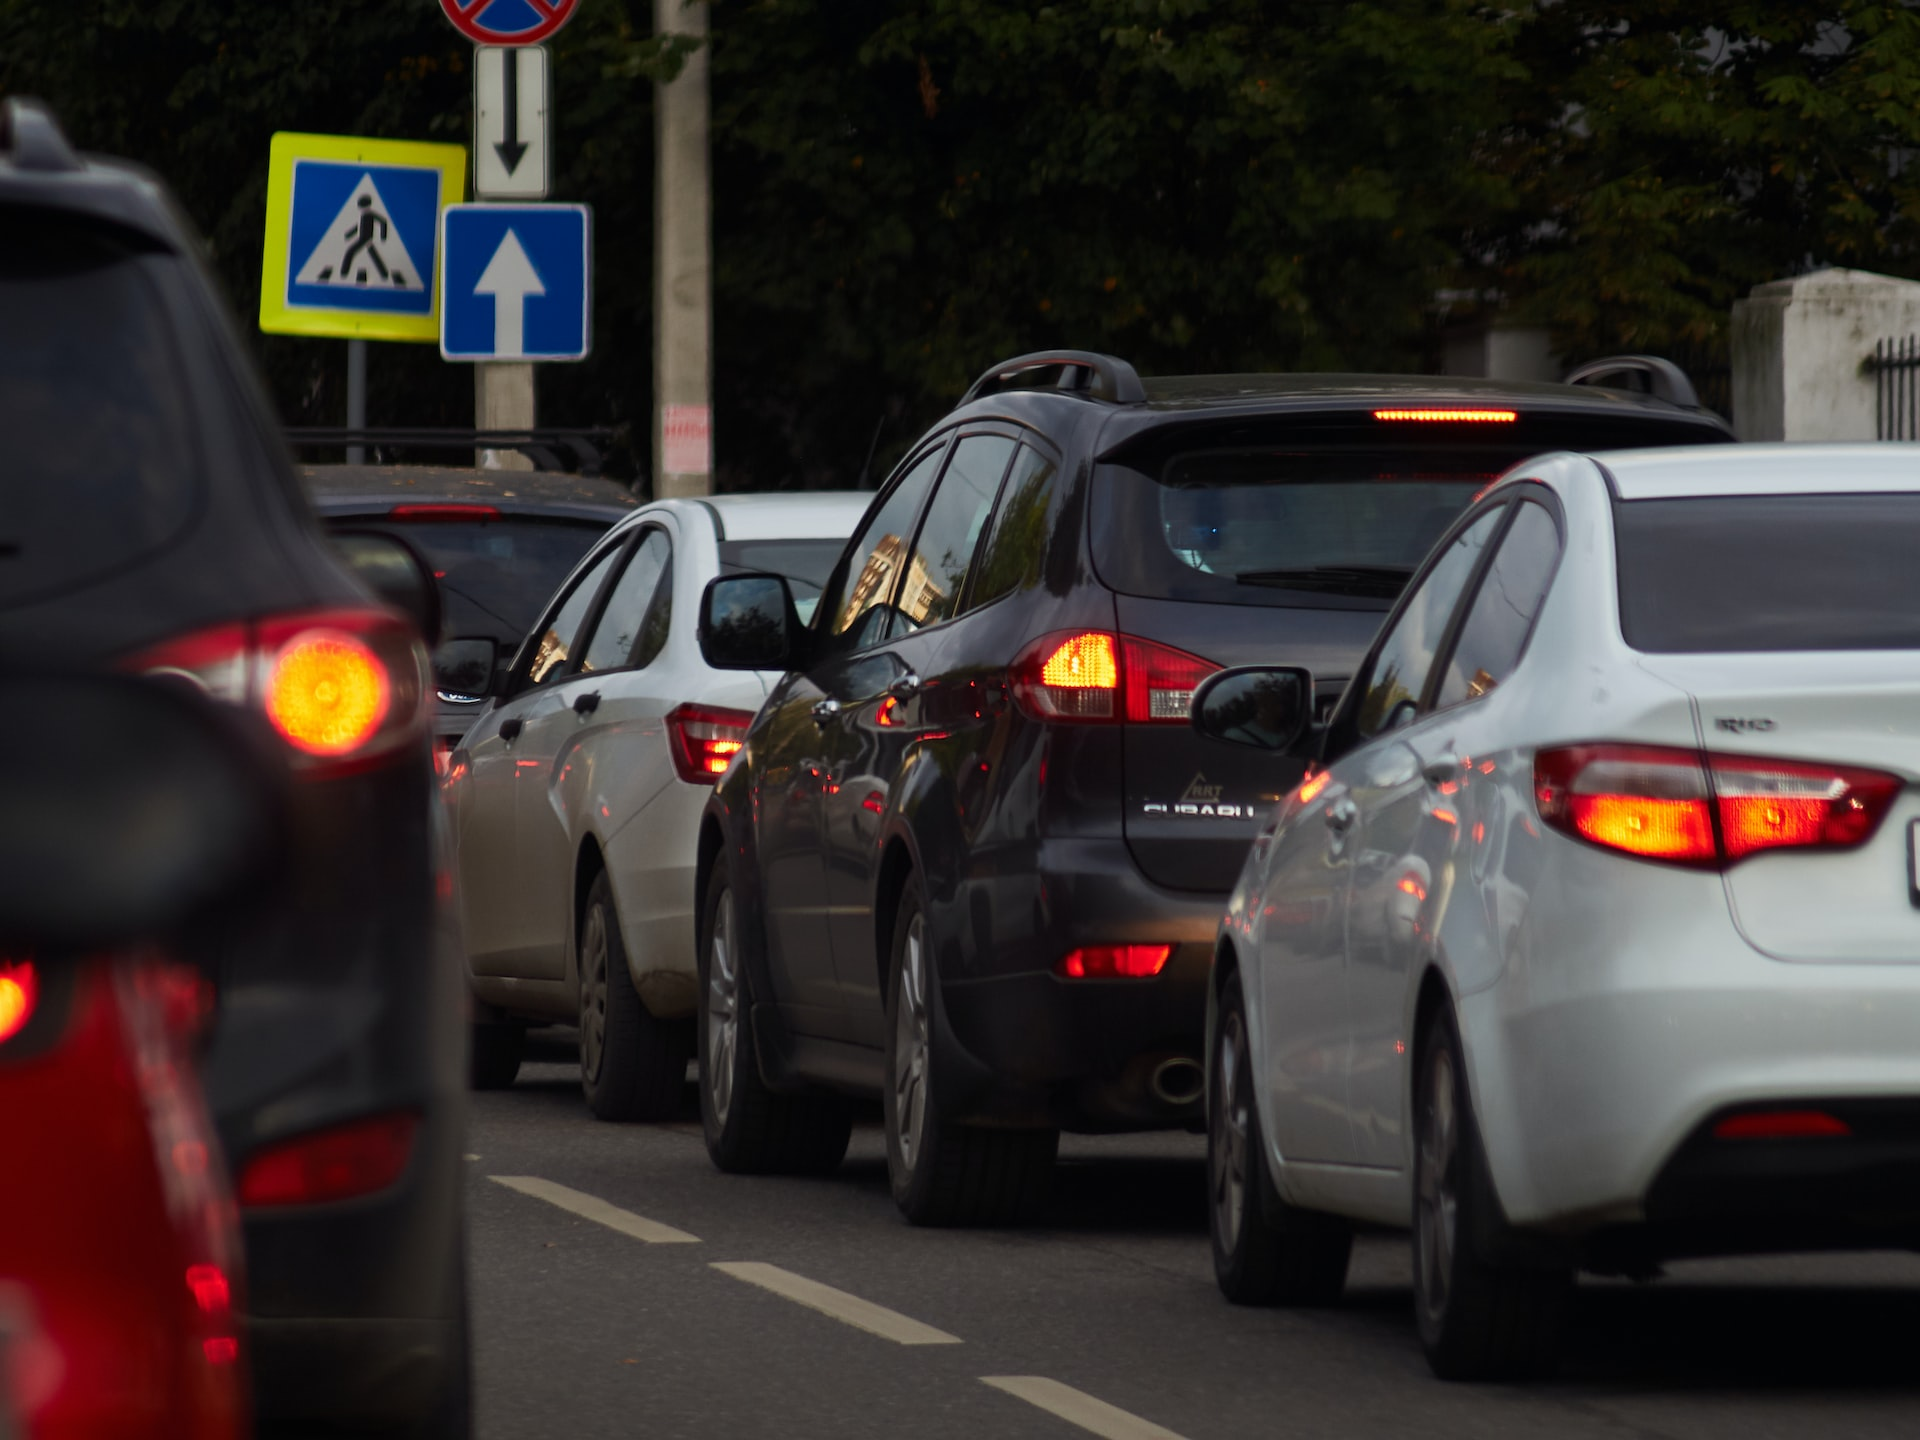

Photo by <a href="https://unsplash.com/@zenitarka?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Kathy</a> on <a href="https://unsplash.com/photos/R7nSPG8edVI?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>
  

## **1) Introdução**

O conjunto de dados contém informações sobre o consumo de combustível e emissões de $CO_2$ de veículos no Canadá.

Para mais informações, acessar o link: [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01)

Assim, temos as seguintes variáveis:

*   **MODELYEAR** 
*   **MAKE** 
*   **MODEL** 
*   **VEHICLE CLASS** 
*   **ENGINE SIZE** 
*   **CYLINDERS** 
*   **TRANSMISSION** 
*   **FUELTYPE** 
*   **FUEL CONSUMPTION in CITY(L/100 km)** 
*   **FUEL CONSUMPTION in HWY (L/100 km)** 
*   **FUEL CONSUMPTION COMB (L/100 km)** 
*   **CO2 EMISSIONS (g/km)**

Sendo assim, o objetivo deste projeto é utilizar diferentes modelos de regressão para fazer a predição da emissão de $CO_2$.

## **2) Bibliotecas**

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from statsmodels.formula.api import ols
import scipy.stats as stats
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
import warnings
warnings.filterwarnings('ignore')

## **3) Abertura e Preparação dos dados**

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/gustavo-andrade-tavares/Datasets/main/FuelConsumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


Nota-se que não é necessário fazer o preenchimento de valores faltantes, uma vez que, não há valores `NaN` no dataset.

Preparando-se os dados para serem utilizados em modelos de regressão, elimina-se algumas variáveis, tais como: `MODELYEAR`, `MAKE`, `MODEL`, `VEHICLECLASS`, `TRANSMISSION` e `FUELTYPE`.

Assim, temos o seguinte conjunto de dados:

In [3]:
data_reg = df.drop(df.columns[[0,1,2,3,6]], axis=1)
data_reg.head()

,ENGINESIZE,CYLINDERS,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,4,Z,9.9,6.7,8.5,33,196
1,2.4,4,Z,11.2,7.7,9.6,29,221
2,1.5,4,Z,6.0,5.8,5.9,48,136
3,3.5,6,Z,12.7,9.1,11.1,25,255
4,3.5,6,Z,12.1,8.7,10.6,27,244


In [ ]:
data_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ENGINESIZE                1067 non-null   float64
 1   CYLINDERS                 1067 non-null   int64  
 2   FUELCONSUMPTION_CITY      1067 non-null   float64
 3   FUELCONSUMPTION_HWY       1067 non-null   float64
 4   FUELCONSUMPTION_COMB      1067 non-null   float64
 5   FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 6   CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(3)
memory usage: 58.5 KB


## **4) Visualização e Exploração dos Dados**

Fazendo-se um resumo descritivo dos dados, temos:

In [ ]:
data_reg.describe()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


Analisando-se as ocorrências das observações de cada tipo de combustível, considera-se o seguinte pie chart:

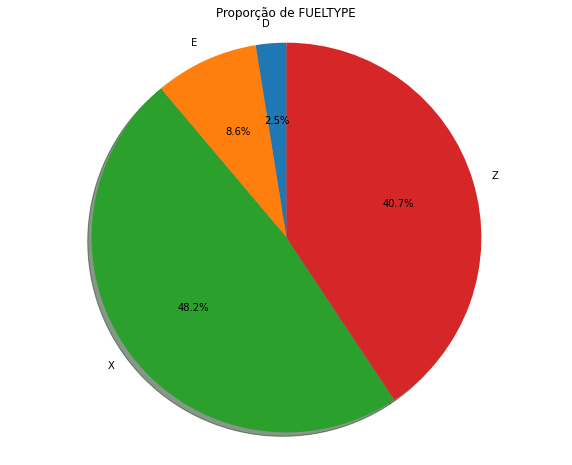

In [ ]:
ft =df.iloc[:,7].values
ft = ft.tolist()

d = ft.count('D')
e = ft.count('E')
x = ft.count('X')
z = ft.count('Z')

freq = [d, e, x, z]
values = np.unique(ft)

fig1, ax1 = plt.subplots(figsize=(10,8))
ax1.pie(freq, explode=(0, 0, 0, 0), labels=values, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proporção de FUELTYPE")
plt.show(True)

Ou seja, há mais observações de carros que utilizam o combustível do tipo $X$ e do tipo $Z$, do que os tipos $E$ e $D$.

Agora, analisando-se o tipo de combustível em relação a emissão de $CO_2$, considera-se o seguinte gráfico:

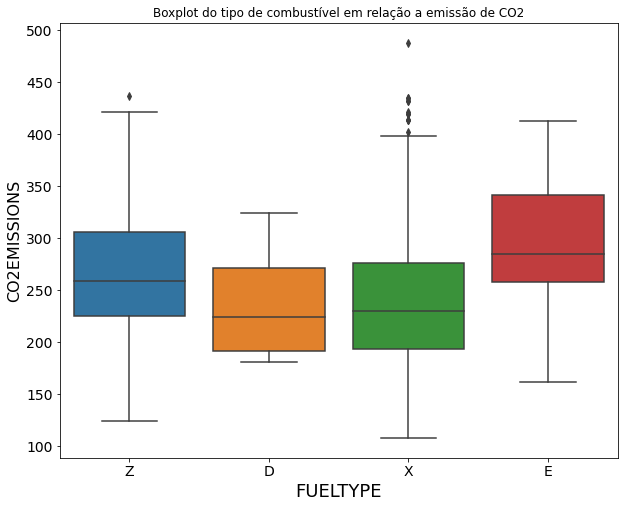

In [ ]:
plt.figure(figsize=(10, 8))
# mostra o boxplot
sns.boxplot(x="FUELTYPE", y="CO2EMISSIONS", data=df)
plt.xlabel('FUELTYPE', fontsize=18)
plt.ylabel('CO2EMISSIONS', fontsize=16)
plt.title("Boxplot do tipo de combustível em relação a emissão de CO2")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show(True)

Verificando-se o número de ocorrências de cada tipo de veículo, temos:

In [ ]:
vc = df.VEHICLECLASS.to_numpy()
u_vc = np.unique(vc)
q = []
l = vc.tolist()

for i in range(len(u_vc)):
  q.append(l.count(u_vc[i]))

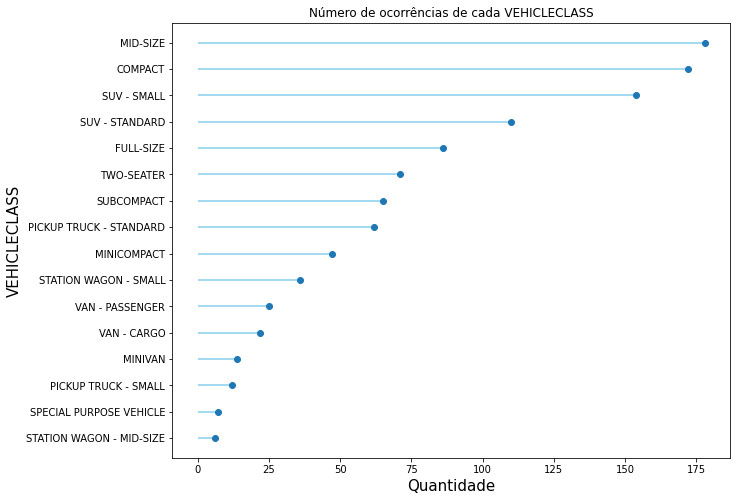

In [ ]:
# Create a dataframe
df = pd.DataFrame({'VEHICLECLASS': u_vc, 'values': q})
 
# Reorder it based on the values
ordered_df = df.sort_values(by='values')
my_range=range(1,len(df.index)+1)
 
# The horizontal plot is made using the hline function
plt.figure(figsize=(10,8))
plt.hlines(y=my_range, xmin=0, xmax=ordered_df['values'], color='skyblue')
plt.plot(ordered_df['values'], my_range, "o")
 
# Add titles and axis names
plt.yticks(my_range, ordered_df['VEHICLECLASS'])
plt.title("Número de ocorrências de cada VEHICLECLASS")
plt.xlabel('Quantidade',fontsize = 15)
plt.ylabel('VEHICLECLASS',fontsize = 15)

# Show the plot
plt.show()

Visualizando-se a relação do tipo de veículo com a emissão de $CO_2$, segue que:

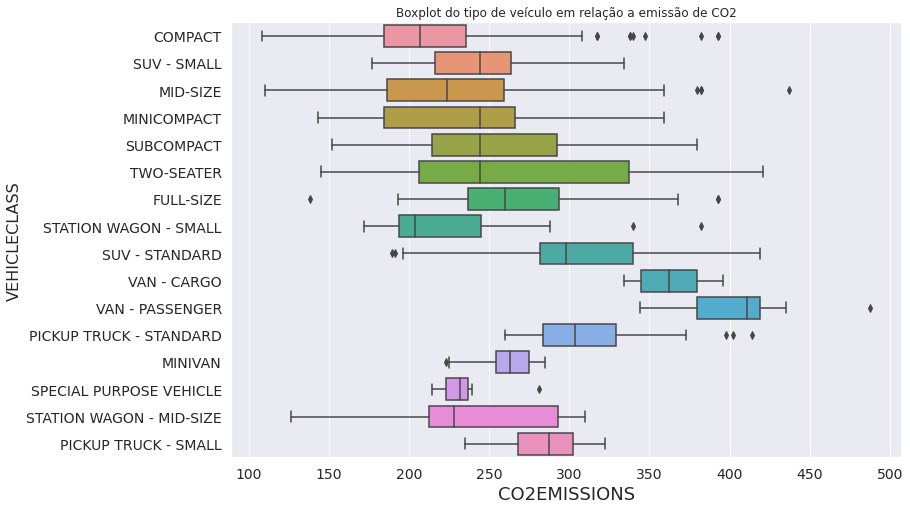

In [ ]:
plt.figure(figsize=(12, 8))
# mostra o boxplot
sns.boxplot(x="CO2EMISSIONS", y="VEHICLECLASS", data=df)
plt.xlabel('CO2EMISSIONS', fontsize=18)
plt.ylabel('VEHICLECLASS', fontsize=16)
plt.title("Boxplot do tipo de veículo em relação a emissão de CO2")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show(True)

Nota-se que, na maioria das classes de veículos, os dados são assimétricos, ou seja, há casos em que os 1° e 3° quantis estão distantes da mediana.

Além disso, observa-se que a classe de carro que mais emite dióxido de carbono, é a `VAN-PASSENGER`.

Verificando-se a associação entre as variáveis `VEHICLECLASS` e `FUELTYPE`, considera-se a seguinte tabela:

In [ ]:
# Tabela de dupla entrada

tabela_dupla = pd.crosstab(index=df['VEHICLECLASS'], columns=df['FUELTYPE'])

tabela_dupla

FUELTYPE,D,E,X,Z
VEHICLECLASS,,,,
COMPACT,5,6,71,90
FULL-SIZE,1,10,34,41
MID-SIZE,8,6,100,64
MINICOMPACT,0,0,9,38
MINIVAN,0,3,11,0
PICKUP TRUCK - SMALL,0,0,12,0
PICKUP TRUCK - STANDARD,2,18,38,4
SPECIAL PURPOSE VEHICLE,0,0,7,0
STATION WAGON - MID-SIZE,0,0,3,3


Para visualizar as ocorrências, temos o seguinte gráfico:

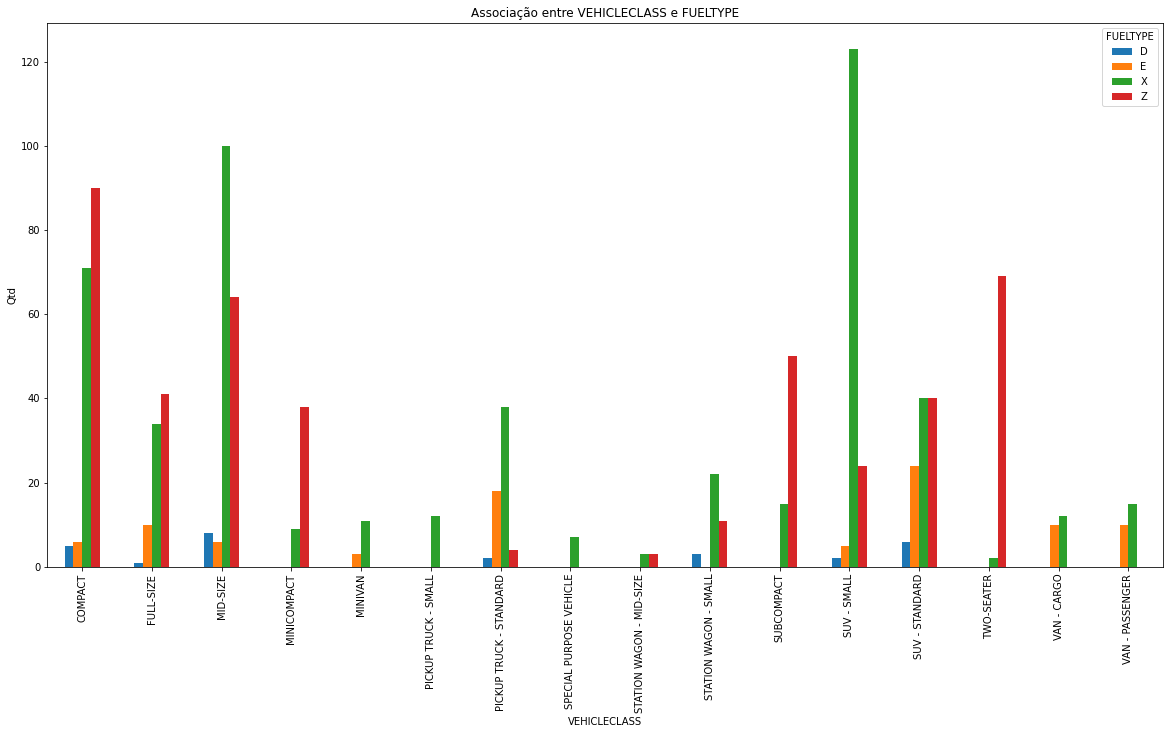

In [ ]:
tabela_dupla.plot.bar(figsize=(20,10),title="Associação entre VEHICLECLASS e FUELTYPE", ylabel="Qtd")

plt.legend(title='FUELTYPE')
plt.show()

Observando-se as relações de cada variável por meio de gráficos scatter plot, temos:

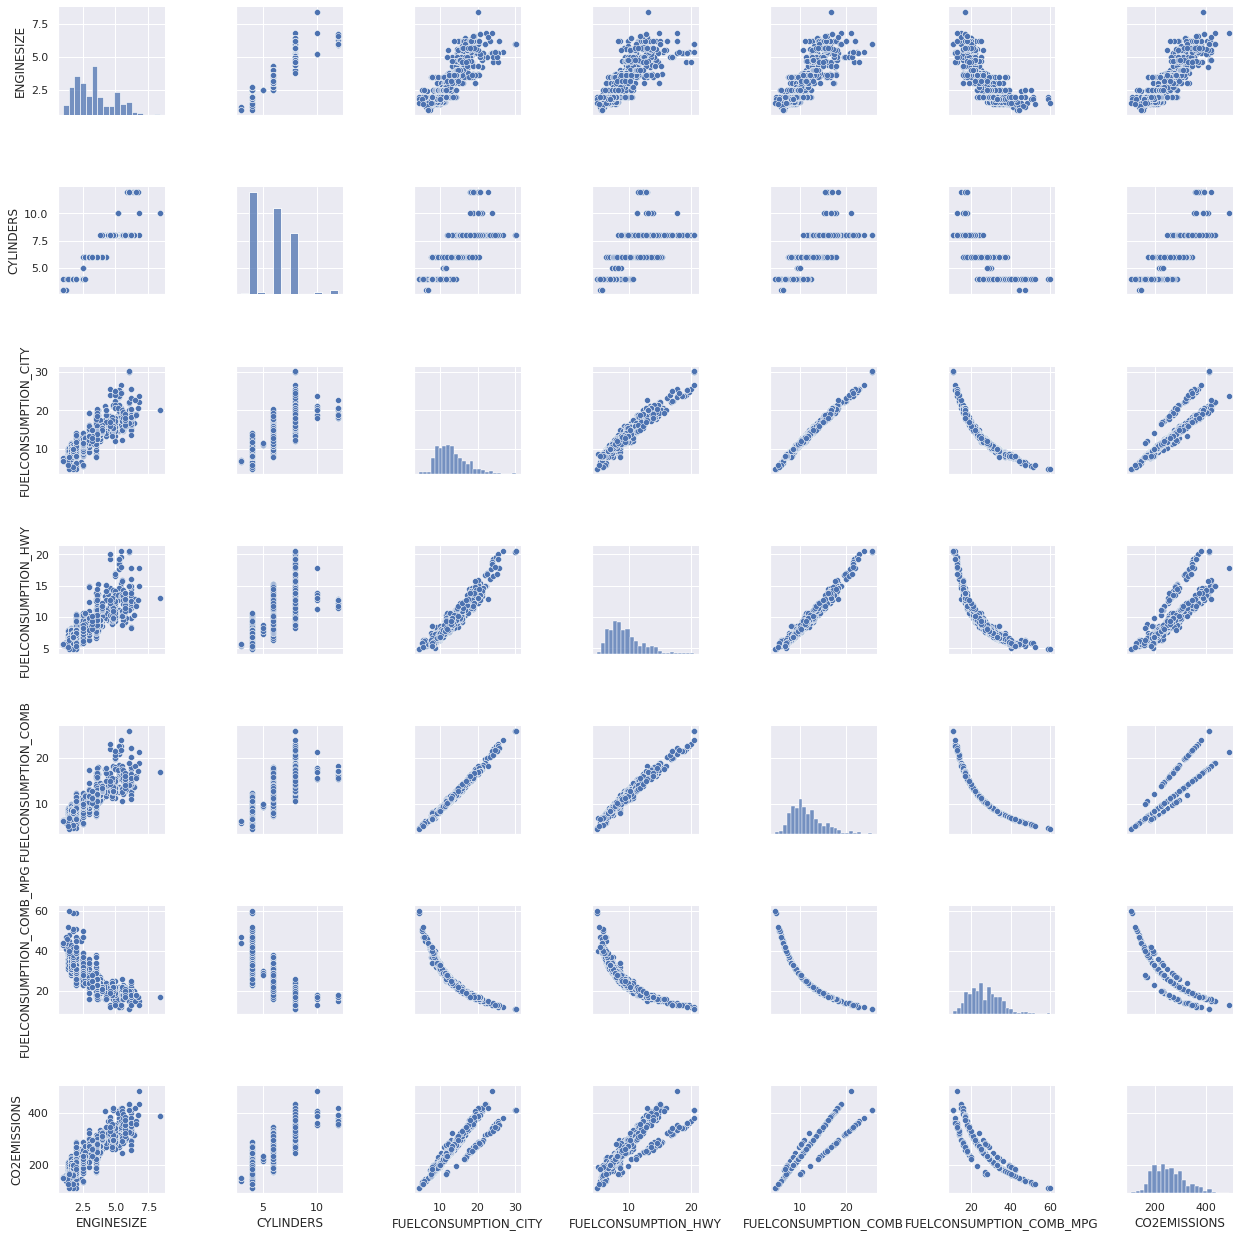

In [ ]:
sns.pairplot(data_reg)
plt.show(True)

Pela análise dos scatter plots, nota-se que a variável `FUELCONSUMPTION_COM_MPG` não tem uma relação linear com as outras variáveis.

Além disso, nota-se que as variáveis `FUELCONSUMPTION_CITY`, `FUELCONSUMPTION_HWY` e `FUELCONSUMPTION_COMB` têm uma relação aproximadamente linear com a variável `CO2EMISSIONS`. 

Nota-se que há grupos que fazem com que apareça três relações lineares e não lineares, no caso da variável `FUELCONSUMPTION_COM_MPG`, com a variável `CO2EMISSIONS`.

Sendo assim, verifica-se se a variável `FUELTYPE` influencia na emissão de $CO_2$.

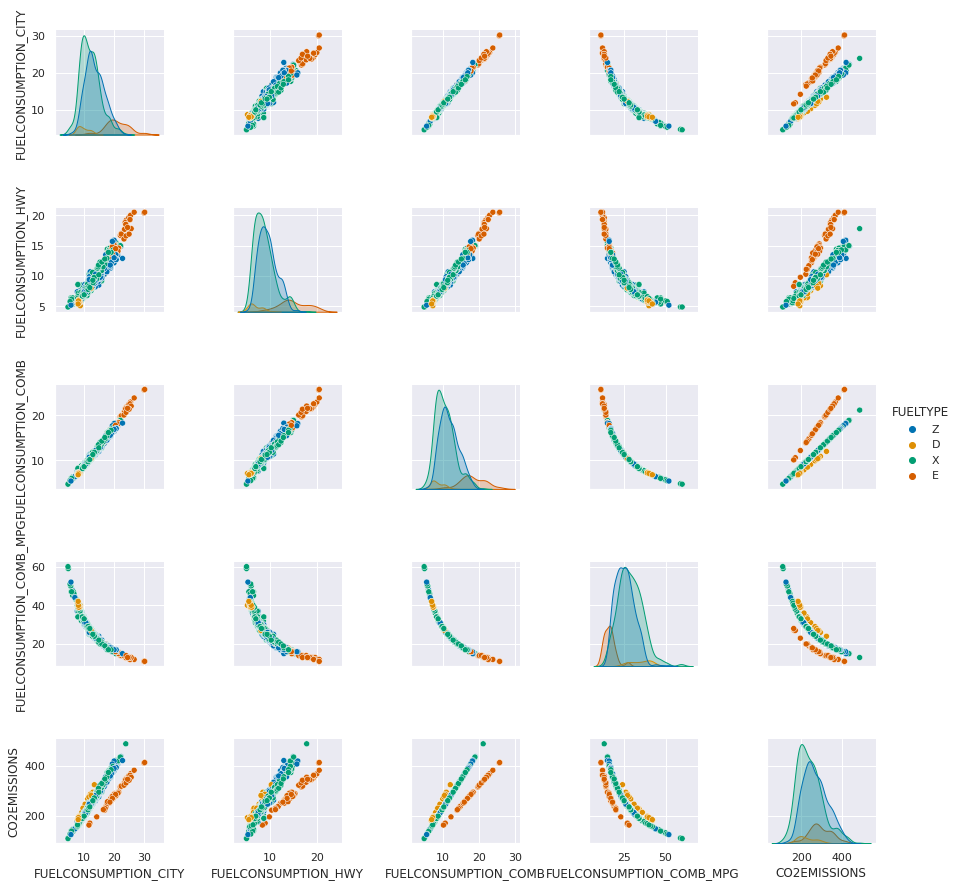

In [ ]:
dados = df.drop(df.columns[[0,1,2,3,4,5,6]], axis=1)
sns.pairplot(dados, hue="FUELTYPE")
plt.show(True)

Por meio deste gráfico, é possível notar que as diferentes relações que ocorrem com a variável `CO2EMISSIONS` são de observações que têm `FUELTYPE` diferentes.

Sendo assim, como o objetivo é fazer a previsão da emissão de $CO_2$ de veículos, e sabendo que veículos com determinados tipos de combustível contribuem de forma diferente, para obter um resultado melhor na regressão, será necessário utilizar Dummy Variables, isto é, variáveis indicadoras para indicar o tipo de combustível do veículo.

Por fim, verificando-se a correlação entre as variáveis, segue que:

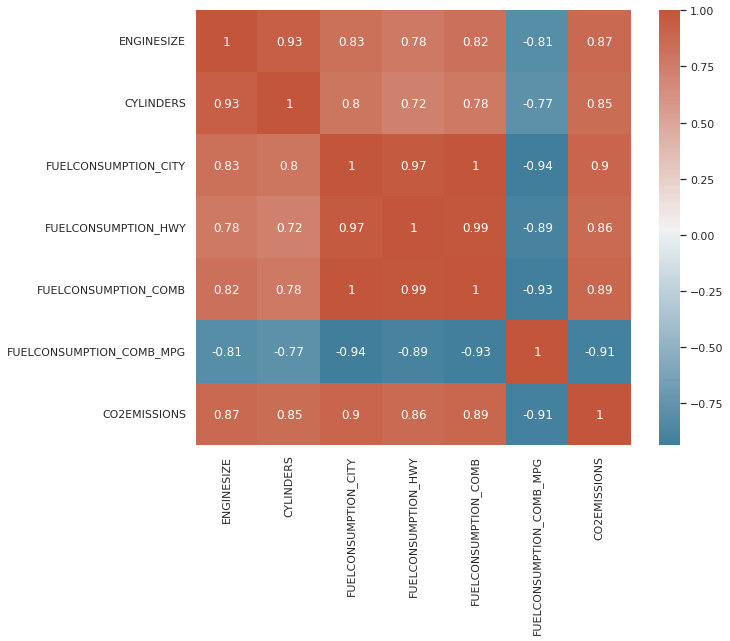

In [ ]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)

corr = data_reg.corr()
plt.figure(figsize=(10,8))
ax = sns.heatmap(
    corr, 
    cmap=cmap,
    square=True, 
    annot = True
)
plt.show(True)

Ou seja, as variáveis estão bastantes correlacionadas. Sendo assim, é necessário fazer a seleção de variáveis para serem incluídas nos modelos de regressão para evitar problemas de multicolinearidade.

Como há correlações que são maiores que $0.9$, é possível remover uma das variáveis que tem esses valores de correlação. Assim, temos:

*  A variável `ENGINESIZE` tem correlação igual a $0.93$ com `CYLINDERS`
*  A variável `FUELCONSUMPTION_CITY` tem correlação igual a $0.97$ com `FUELCONSUMPTION_HWY` e correlação igual a $1$ com `FUELCONSUMPTION_COMB`
*  A variável `FUELCONSUMPTION_COMB` tem correlação igual a $0.99$ com `FUELCONSUMPTION_HWY`

Sendo assim, é possível eliminar as variáveis `CYLINDERS`, `FUELCONSUMPTION_CITY` e `FUELCONSUMPTION_HWY` dos modelos de regressão, uma vez que, são redundantes.


## **5) Modelos de regressão com Dummy Variables**

Preparando-se o conjunto de dados para aplicar nos modelos de regressão, obtém-se as Dummy Variables e, também, elimina-se as variáveis que são redundantes:

In [4]:
data_reg = pd.get_dummies(data_reg)
data_reg.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS,FUELTYPE_D,FUELTYPE_E,FUELTYPE_X,FUELTYPE_Z
0,2.0,4,9.9,6.7,8.5,33,196,0,0,0,1
1,2.4,4,11.2,7.7,9.6,29,221,0,0,0,1
2,1.5,4,6.0,5.8,5.9,48,136,0,0,0,1
3,3.5,6,12.7,9.1,11.1,25,255,0,0,0,1
4,3.5,6,12.1,8.7,10.6,27,244,0,0,0,1


Como é necessário apenas $k-1$ variáveis indicadoras, assim, exclui-se a variável indicadora mais frequente, que pela análise exploratória, é o `FUELTYPE_X`

In [5]:
data_reg = data_reg.drop(data_reg.columns[[1,2,3,9]], axis = 1)
data_reg.head()

,ENGINESIZE,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS,FUELTYPE_D,FUELTYPE_E,FUELTYPE_Z
0,2.0,8.5,33,196,0,0,1
1,2.4,9.6,29,221,0,0,1
2,1.5,5.9,48,136,0,0,1
3,3.5,11.1,25,255,0,0,1
4,3.5,10.6,27,244,0,0,1


### **5.1) Regressão Linear Múltipla**

Utilizando-se a regressão linear múltipla, transforma-se os dados no formato do `Numpy`, para facilitar a manipulação, e utiliza-se o `StandardScaler()`, uma vez que os dados têm escalas diferentes e obtém-se o conjunto de treinamento e teste:

In [ ]:
data = data_reg.to_numpy()
nrow,ncol = data.shape
y = data[:,3].reshape(-1,1) 
X = data[:,[0,1,2,4,5,6]]


scaler = StandardScaler()

X_norm = scaler.fit_transform(X)
y_norm = scaler.fit_transform(y)

# divide o conjunto em treinamento e teste
p = 0.2 # fracao e elementos no conjnto de teste
x_train, x_test, y_train, y_test = train_test_split(X_norm, y_norm, test_size = p, random_state = 42)

Para fazer inferência sobre os coeficientes da regressão, utiliza-se a função `ols` do pacote `statsmodels`.

Para isso, é necessário transformar o conjunto de treinamento em DataFrame:

In [ ]:
c = ['ENGINESIZE', 'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_COMB_MPG','FUELTYPE_D', 'FUELTYPE_E', 'FUELTYPE_Z']
df1 = pd.DataFrame(x_train, columns=c)
df2 = pd.DataFrame(y_train,columns =['CO2EMISSIONS'])

df_train = df1.join(df2)
df_train.head()

,ENGINESIZE,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,FUELTYPE_D,FUELTYPE_E,FUELTYPE_Z,CO2EMISSIONS
0,-1.375251,-1.085225,1.280418,-0.161126,-0.307179,-0.828024,-1.219222
1,0.744544,0.321220,-0.594950,-0.161126,-0.307179,1.207694,0.564728
2,-0.244694,-0.482463,0.342734,6.206329,-0.307179,-0.828024,0.170049
3,-0.244694,-0.051918,-0.193086,-0.161126,-0.307179,1.207694,0.091113
4,1.380482,1.411933,-1.264725,-0.161126,-0.307179,-0.828024,1.953998


In [ ]:
model_ols = ols(formula='CO2EMISSIONS ~ ENGINESIZE + FUELCONSUMPTION_COMB + FUELCONSUMPTION_COMB_MPG + FUELTYPE_D + FUELTYPE_E + FUELTYPE_Z', data = df_train).fit()
print(model_ols.summary())

                            OLS Regression Results                            
Dep. Variable:           CO2EMISSIONS   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                 1.891e+04
Date:                Tue, 21 Feb 2023   Prob (F-statistic):               0.00
Time:                        23:04:49   Log-Likelihood:                 886.02
No. Observations:                 853   AIC:                            -1758.
Df Residuals:                     846   BIC:                            -1725.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

Nota-se que o `p-value` da variável indicadora `FUELTYPE_Z` é alto, portanto, ela não é significante, logo, pode ser retirada:

In [ ]:
model_ols = ols(formula='CO2EMISSIONS ~ ENGINESIZE + FUELCONSUMPTION_COMB + FUELCONSUMPTION_COMB_MPG + FUELTYPE_D + FUELTYPE_E', data = df_train).fit()
print(model_ols.summary())

                            OLS Regression Results                            
Dep. Variable:           CO2EMISSIONS   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                 2.270e+04
Date:                Tue, 21 Feb 2023   Prob (F-statistic):               0.00
Time:                        23:05:42   Log-Likelihood:                 885.53
No. Observations:                 853   AIC:                            -1759.
Df Residuals:                     847   BIC:                            -1731.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

Após selecionar as variáveis para serem incluídas no modelo de regressão linear múltipla, nota-se pelos resultados do `ols` que os erros não são normalmente distribuídos, uma vez que, `Prob(Omnibus) = 0`.

Assim, considera-se também, o gráfico de probabilidade normal, que comprova se os erros têm distribuição normal ou não:

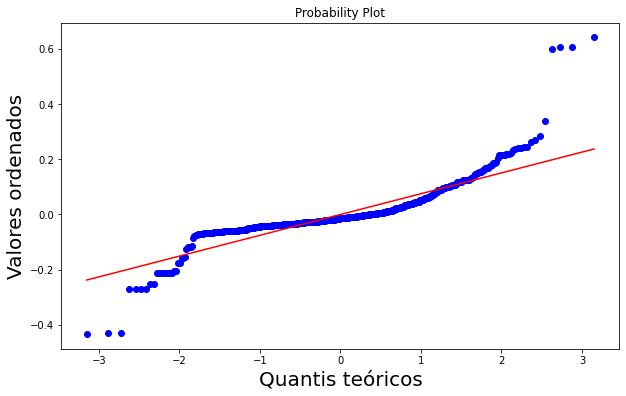

In [ ]:
residuals = model_ols.resid

plt.figure(figsize=(10,6))
stats.probplot(np.sort(residuals), dist="norm",plot=plt)

plt.xlabel('Quantis teóricos', fontsize = 20)
plt.ylabel('Valores ordenados',fontsize = 20)
plt.show(True)

Como os pontos não estão muito alinhados com a reta em vermelho, e também, há presença de outliers, o gráfico indica que os erros não têm distribuição normal.

Além disso, analisando-se o gráfico dos valores preditos com os resíduos, nota-se que os pontos não estão distribuídos aleatoriamente em torno de zero.

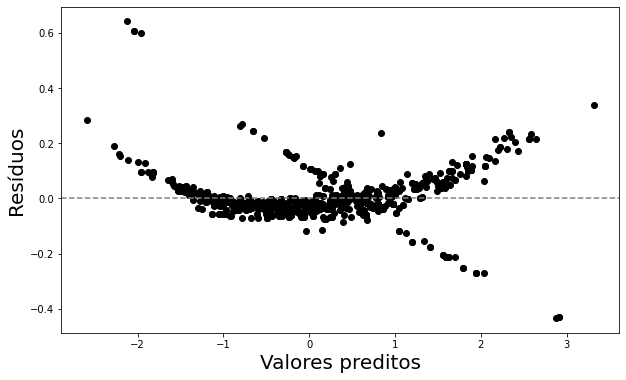

In [ ]:
plt.figure(figsize=(10,6))

plt.scatter(model_ols.fittedvalues, residuals,color='black')
plt.axhline(y = 0, color = 'gray', linestyle = '--')
plt.xlabel('Valores preditos',fontsize = 20)
plt.ylabel('Resíduos', fontsize = 20)
plt.show(True)

Sendo assim, como os erros não têm distribuição normal, não será possível utilizar o modelo de regressão múltipla, uma vez que, este modelo assume normalidade dos erros.

Assim, para fazer a predição da variável `CO2EMISSIONS`, é possível utilizar modelos que não assumem normalidade dos erros, como por exemplo:



*   Lasso Regression
*   Ridge Regression
*   Elastic Net Regression



### **5.2) Lasso Regression**


Para utilizar este modelo, prepara-se os dados transformando-se para o formato do `Numpy`, utiliza-se o `StandardScaler()` e obtém-se os conjuntos de treinamento e teste:

In [ ]:
data = data_reg.to_numpy()
nrow,ncol = data.shape
y = data[:,3].reshape(-1,1) 
X = data[:,[0,1,2,4,5,6]]

scaler = StandardScaler()

X = scaler.fit_transform(X)
y = scaler.fit_transform(y)

# divide o conjunto em treinamento e teste
p = 0.2 # fracao e elementos no conjnto de teste
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = p, random_state = 42)

Para escolher o melhor parâmetro `alpha` para ser incluído no modelo, temos:

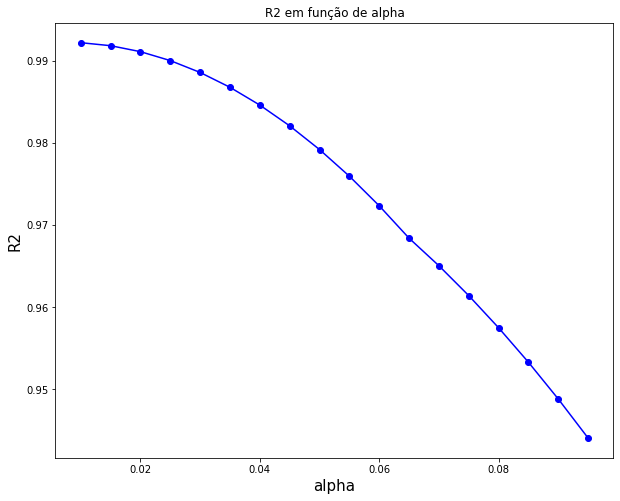

In [ ]:
vR2 = []
valpha = []
for alpha in np.arange(0.01,0.1,0.005):
    lasso = Lasso(alpha = alpha, max_iter=1e6)
    lasso.fit(x_train, y_train)             # Fit a ridge regression on the training data
    y_pred = lasso.predict(x_test)           # Use this model to predict the test data
    r2 = r2_score(y_test, y_pred)
    vR2.append(r2)
    valpha.append(alpha)
plt.figure(figsize=(10,8))
plt.plot(valpha, vR2, '-bo')
plt.xlabel("alpha", fontsize=15)
plt.ylabel("R2", fontsize=15)
plt.title("R2 em função de alpha")
plt.show(True)

Assim, o valor de `alpha` que maximiza o $R^2$ é $0.01$

Além disso, é possível selecionar as variáveis a serem incluídas no modelo, uma vez que, as variáveis que não são importantes recebem o coeficiente igual a zero.

In [ ]:
lasso = Lasso(alpha = 0.01,max_iter=1e6)
lasso.fit(x_train, y_train)             # Fit a ridge regression on the training data
print('Coeficientes: ENGINESIZE, FUELCONSUMPTION_COMB ,FUELCONSUMPTION_COMB_MPG', 'FUELTYPE_D', 'FUELTYPE_E', 'FUELTYPE_Z')
lasso.coef_

Coeficientes: ENGINESIZE, FUELCONSUMPTION_COMB ,FUELCONSUMPTION_COMB_MPG FUELTYPE_D FUELTYPE_E FUELTYPE_Z


array([ 0.05919894,  0.94946848, -0.17950983,  0.07025573, -0.46233758,
        0.        ])

Nota-se que a variável indicadora `FUELTYPE_Z` recebe coeficiente igual a zero, sendo assim, esta pode ser removida, pois não é importante para a regressão.

In [ ]:
data = data_reg.to_numpy()
nrow,ncol = data.shape
y = data[:,3].reshape(-1,1) 
X = data[:,[0,1,2,4,5]]

scaler = StandardScaler()

X = scaler.fit_transform(X)
y = scaler.fit_transform(y)

# divide o conjunto em treinamento e teste
p = 0.2 # fracao e elementos no conjnto de teste
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = p, random_state = 42)

Após remover a variável `FUELTYPE_Z`, utiliza-se o modelo Lasso com o valor `alpha = 0.01`.

In [ ]:
alpha = 0.01
# notice that we need to normalize the attributes: normalize = True
lasso = Lasso(alpha=alpha, max_iter=1e5)
lasso.fit(x_train, y_train)             # Fit a ridge regression on the training data
y_pred = lasso.predict(x_test)  

Verificando-se as métricas do modelo, temos:

In [ ]:
print('R2:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

R2: 0.9922364796978874
MAE: 0.05775530237462542
MSE: 0.008000860485176097
RMSE: 0.08944752922901839


Observa-se que o modelo performa bem, uma vez que tem um valor de $R^2$ alto e valores de $MAE$ e $MSE$ baixos.

Utilizando-se diferentes divisões dos conjuntos de treinamento e teste, obtém-se os valores médios das métricas:

In [ ]:
cv = KFold(n_splits=10)
v_r2 = []
v_mae = []
v_mse = []
v_rmse = []

for train_index, test_index in cv.split(X, y):
    x_train, x_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model = Lasso(alpha=0.01, max_iter=1e5)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test) 
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    v_r2.append(r2)
    v_mae.append(mae)
    v_mse.append(mse)
    v_rmse.append(rmse)

r2_lasso = np.mean(v_r2)
mae_lasso = np.mean(v_mae)
mse_lasso = np.mean(v_mse)
rmse_lasso = np.mean(v_rmse)

print("R2 médio:", r2_lasso)
print("MAE médio:", mae_lasso)
print("MSE médio:", mse_lasso)
print("RMSE médio:", rmse_lasso)

R2 médio: 0.991311661473499
MAE médio: 0.06128986412076689
MSE médio: 0.009031549415344772
RMSE médio: 0.09067336448025087


Analisando-se os valores médios das métricas, nota-se que o modelo Lasso não apresenta muita variância com diferentes divisões do conjunto de treinamento e teste.

### **5.3) Ridge Regression**

Para o Ridge Regression, também, faz-se o mesmo procedimento na preparação dos dados. Além disso, como foi obtido que a variável `FUELTYPE_Z` não é significante, elimina-se esta variável.

In [ ]:
data = data_reg.to_numpy()
nrow,ncol = data.shape
y = data[:,3].reshape(-1,1) 
X = data[:,[0,1,2,4,5]]

scaler = StandardScaler()

X = scaler.fit_transform(X)
y = scaler.fit_transform(y)

# divide o conjunto em treinamento e teste
p = 0.2 # fracao e elementos no conjnto de teste
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = p, random_state = 42)

Para encontrar o valor de alpha do modelo Ridge Regression, testa-se o modelo para diferentes valores de alpha, e seleciona-se o valor de alpha que maximiza $R^2$:

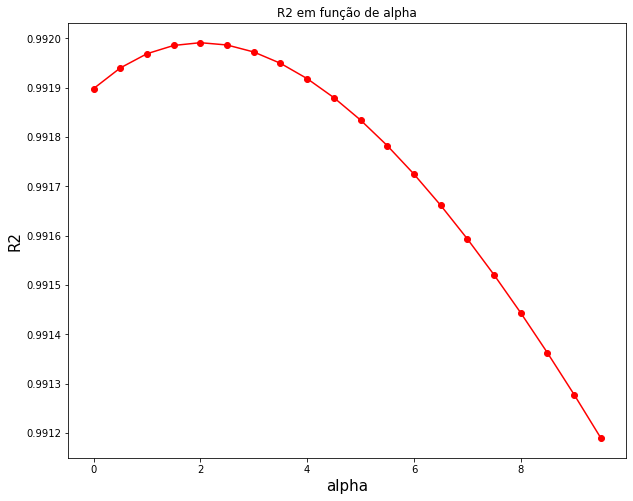

In [ ]:
vR2 = []
valpha = []
for alpha in np.arange(0,10,0.5):
    ridge = Ridge(alpha = alpha, max_iter=1e6)
    ridge.fit(x_train, y_train)             # Fit a ridge regression on the training data
    y_pred = ridge.predict(x_test)           # Use this model to predict the test data
    r2 = r2_score(y_test, y_pred)
    vR2.append(r2)
    valpha.append(alpha)
plt.figure(figsize=(10,8))
plt.plot(valpha, vR2, '-ro')
plt.xlabel("alpha", fontsize=15)
plt.ylabel("R2", fontsize=15)
plt.title("R2 em função de alpha")
plt.show(True)

In [ ]:
print("O valor de alpha que maximiza R2 é: ",valpha[np.argmax(vR2)])

O valor de alpha que maximiza R2 é:  2.0


In [ ]:
alpha = 2
# notice that we need to normalize the attributes: normalize = True
ridge = Ridge(alpha=alpha, max_iter=1e5)
ridge.fit(x_train, y_train)             # Fit a ridge regression on the training data
y_pred = ridge.predict(x_test) 

In [ ]:
print('R2:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

R2: 0.9919913714121125
MAE: 0.0556679162880975
MSE: 0.00825346202699377
RMSE: 0.09084856645535894


Semelhantemente ao modelo Lasso Regression, o Ridge Regression também performa bem, pois os valores das métricas são bons.

Assim, obtendo-se os valores médios das métricas, segue que:

In [ ]:
cv = KFold(n_splits=10)
v_r2 = []
v_mae = []
v_mse = []
v_rmse = []

for train_index, test_index in cv.split(X, y):
    x_train, x_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model = Ridge(alpha=2, max_iter=1e5)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test) 
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    v_r2.append(r2)
    v_mae.append(mae)
    v_mse.append(mse)
    v_rmse.append(rmse)

r2_ridge = np.mean(v_r2)
mae_ridge = np.mean(v_mae)
mse_ridge = np.mean(v_mse)
rmse_ridge = np.mean(v_rmse)

print("R2 médio:", r2_ridge)
print("MAE médio:", mae_ridge)
print("MSE médio:", mse_ridge)
print("RMSE médio:", rmse_ridge)

R2 médio: 0.9919223231857899
MAE médio: 0.05699306516116409
MSE médio: 0.008575278506735007
RMSE médio: 0.08617547303549211


Analisando-se os valores médios das métricas, nota-se que o modelo Ridge, também, não apresenta muita variância com diferentes divisões do conjunto de treinamento e teste.

### **5.4) Elastic Net**

Por fim, utilizando-se o modelo Elastic Net, faz-se o mesmo procedimento:

In [ ]:
data = data_reg.to_numpy()
nrow,ncol = data.shape
y = data[:,3].reshape(-1,1) 
X = data[:,[0,1,2,4,5]]

scaler = StandardScaler()

X = scaler.fit_transform(X)
y = scaler.fit_transform(y)

# divide o conjunto em treinamento e teste
p = 0.2 # fracao e elementos no conjnto de teste
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = p, random_state = 42)

Para encontrar os melhores valores dos parâmetros `alpha` e `l1_ratio` do modelo, utiliza-se `ElasticNetCV`:

In [ ]:
# Encontra alpha e l1_ratio
e_n_cv = ElasticNetCV(cv = 10).fit(x_train,y_train)

alpha = e_n_cv.alpha_
l1 = e_n_cv.l1_ratio_

print('alpha: ',alpha)
print('l1_ratio: ',l1)

alpha:  0.0017664290936688421
l1_ratio:  0.5


Aplicando-se esses parâmetros no modelo, segue que:

In [ ]:
elastic_net = ElasticNet(alpha=alpha, l1_ratio=l1, max_iter=1e5)
elastic_net.fit(x_train, y_train)             
y_pred = elastic_net.predict(x_test) 

Obtendo-se as métricas:

In [ ]:
print('R2:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

R2: 0.9920311552322657
MAE: 0.05443433395394564
MSE: 0.008212461967455462
RMSE: 0.09062263496199756


Semelhantemente aos dois modelos anteriores, o modelo ElasticNet também retorna resultados muito bons.

Obtendo-se os valores médios das métricas, temos:

In [ ]:
cv = KFold(n_splits=10)
v_r2 = []
v_mae = []
v_mse = []
v_rmse = []

for train_index, test_index in cv.split(X, y):
    x_train, x_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model = ElasticNet(alpha=alpha, l1_ratio=l1, max_iter=1e5)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test) 
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    v_r2.append(r2)
    v_mae.append(mae)
    v_mse.append(mse)
    v_rmse.append(rmse)

r2_elastic_net = np.mean(v_r2)
mae_elastic_net = np.mean(v_mae)
mse_elastic_net = np.mean(v_mse)
rmse_elastic_net = np.mean(v_rmse)

print("R2 médio:", r2_elastic_net)
print("MAE médio:", mae_elastic_net)
print("MSE médio:", mse_elastic_net)
print("RMSE médio:", rmse_elastic_net)

R2 médio: 0.9919692115033317
MAE médio: 0.05603887753974272
MSE médio: 0.008582388821707785
RMSE médio: 0.08572391491210052


Analisando-se os valores médios das métricas, nota-se que o modelo ElasticNet, também, não apresenta muita variância com diferentes divisões do conjunto de treinamento e teste.

## **6) Conclusão**

Neste projeto, o objetivo foi fazer a previsão da emissão de $CO_2$ de diferentes tipos de veículos, utilizando-se modelos de regressão tais como: Regressão Linear Múltipla, Lasso Regression, Ridge Regression e Elastic Net Regression.

Por meio da análise exploratória dos dados, foi observado que as variáveis são altamente correlacionadas entre si. Sendo assim, foi necessário escolher as variáveis mais importantes a serem incluídas nos modelos.

Pela análise dos gráficos scatter plot das variáveis em relação a `CO2EMISSIONS`, foi observado que aparece mais de uma relação linear, ou não linear no caso da variável `FUELCONSUMPTION_COMB_MPG`. Por isso, foi utilizado modelos de regressão com Dummy Variables, para indicar o tipo de combustível do veículo.

Ao utilizar o modelo de Regressão Linear Múltipla, foi notado que os erros não têm distribuição normal. Por isso, este modelo não é adequado para fazer a predição de `CO2EMISSIONS`. 

Sendo assim, foi obtido os seguintes resultados dos modelos:

In [ ]:
metricas = {"R2": [r2_lasso, r2_ridge, r2_elastic_net], 
            "MAE": [mae_lasso, mae_ridge, mae_elastic_net], 
            "MSE": [mse_lasso, mse_ridge, mse_elastic_net], 
            "RMSE": [rmse_lasso, rmse_ridge, rmse_elastic_net]}

resultados = pd.DataFrame(metricas, index = ["Lasso Regression", "Ridge Regression", "Elastic Net"])

print('Resumo dos resultados:')
resultados

Resumo dos resultados:


,R2,MAE,MSE,RMSE
Lasso Regression,0.991312,0.061290,0.009032,0.090673
Ridge Regression,0.991922,0.056993,0.008575,0.086175
Elastic Net,0.991969,0.056039,0.008582,0.085724


Pela análise dos resultados, os três modelos têm resultados bastante próximos. Porém, o modelo Elastic Net teve o valor de $R^2$ levemente mais elevado e o menor valor de $MAE$. Em relação ao $MSE$, o modelo Ridge Regression tem o menor valor.

Portanto, para fazer a predição de `CO2EMISSIONS`, no geral, é possível utilizar qualquer um dos três modelos, pois as diferenças são mínimas. Mas considerando-se um modelo com melhor valor de $MAE$, escolhe-se o Elastic Net. Caso a métrica de interesse é $MSE$, escolhe-se o Ridge Regression.